## Improving SGD

In [0]:
import pandas as pn
url ='https://raw.githubusercontent.com/swakkhar/MachineLearning/master/logistic.csv'
data = pn.read_csv(url,header=None)

import numpy as np
data=np.asarray(data)
X = np.delete(data, data.shape[1] - 1, axis=1)
y = data[:, -1]

In [0]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

  
import copy
def learnWeights(X,y,maxIter,alpha):
  ones = np.ones((X.shape[0],1))
  # Deep copy the parameters
  X=copy.deepcopy(X)
  y=copy.deepcopy(y)
  X=np.concatenate((ones,X),axis=1)
  X=np.mat(X)
  y=np.mat(y)
  w=np.random.rand(X.shape[1],1)
  #w = np.ones((X.shape[1], 1))
  for i in range(0,maxIter):
    # predict y
    z=X*w
    predy=sigmoid(z)
    delY = predy-y.T
    delw = X.T * delY
    w = w - delw * alpha
  return w

print(X.shape)
print(y.shape)
w=learnWeights(X,y,2000,0.001)
print(w)

(100, 2)
(100,)
[[ 6.93811382]
 [ 0.6983831 ]
 [-0.97559507]]


In [0]:
import random
def ImprovedStocGradDescent(X, y, numIter=150):
  X=copy.deepcopy(X)
  y=copy.deepcopy(y)
  
  m,n = X.shape
  ones = np.ones((X.shape[0], 1))
  X = np.concatenate((ones, X), axis=1)
  X = np.mat(X)
  y = np.mat(y)
  y=y.T
  w = np.random.rand(X.shape[1], 1)
  
  for j in range(numIter):
    dataIndex = []
    for i in range(m):
      dataIndex.append(i)
    for i in range(m):
      alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not go to 0 because of the constant
      randIndex = int(random.uniform(0,len(dataIndex))) 
      
      h = sigmoid((X[randIndex])*w)
      error = y[randIndex] - h
      w = w + alpha * (error * X[randIndex]).T
      #print('print',randIndex,len(dataIndex))
      del(dataIndex[randIndex])
  return w

print(X.shape)
print(y.shape)
w1=ImprovedStocGradDescent(X,y)
print(w1)

(100, 2)
(100,)
[[15.3365105 ]
 [ 1.03612662]
 [-2.16280886]]


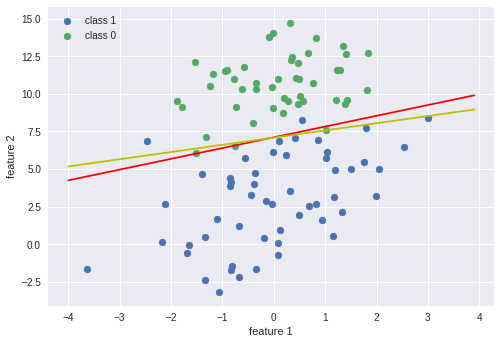

In [0]:
import matplotlib
import matplotlib.pyplot as plt

classA=[]
classB=[]
i=0
for index in y:
    if index==1.0:
        classA.append(X[i,:])
    else:
        classB.append(X[i, :])
    i+=1
a=plt.scatter(np.asarray(classA)[:,0],np.asarray(classA)[:,-1])

b=plt.scatter(np.asarray(classB)[:,0],np.asarray(classB)[:,-1])
plt.legend((a,b),('class 1','class 0'),loc='upper left')


testx = np.arange(-4.0, 4.0, 0.1)

testy = (-w[0]-w[1]*testx)/w[2]
plt.plot(testx,testy.T,color="r")

testy1 = (-w1[0]-w1[1]*testx)/w1[2]
plt.plot(testx,testy1.T,color="y")

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()